In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# エクセルファイルの読み込み
SIS_df=pd.read_excel("SIS分析プロジェクト_日刊60日切り-週間100データ対応_容量削減ver_200819.xlsm",
                     sheet_name="日毎データ累積",
                     header=1,
                     encoding="cp932")
SIS_df_droped=SIS_df.dropna(subset=["機種名"])
SIS_df_droped['機種名'].str.strip()
Spec_df=pd.read_excel("右打ちチェック用市場データ改β.xlsm",
                      sheet_name="データベース",                      
                      encoding="cp932")
Product_df=pd.read_excel("過去機種データベースまとめ_200416.xlsx",
                         sheet_name="オール機種 数値化",
                         header=11,
                         encoding="cp932")

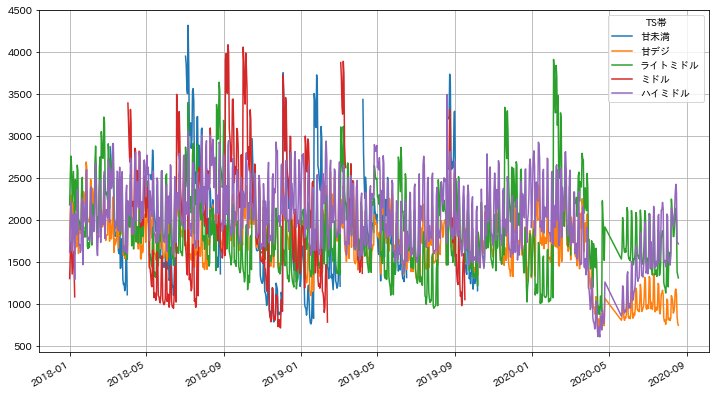

In [64]:
SIS_df_droped=SIS_df_droped.set_index("日付")["2018-01-01":].reset_index()
pivot_SIS_df=SIS_df_droped.pivot_table(index="機種名", 
                                       columns="日付",
                                       values="アウト",
                                       aggfunc="mean")
# 対象となる日付をリスト化して保持
date_list=list(pivot_SIS_df.columns)
merge_df=pd.merge(left=pivot_SIS_df,
                  right=Spec_df,
                  left_index=True,
                  right_on="Product_name",
                  how="left")
df_renamed=merge_df.rename(columns={"Oneshot_Rate":"単発率",
                                     "SurfaceCont_Rate":"名目継続率",
                                     "HeavenRush_Rate":"天国突入率"})
# 継続率をビン分割
Cont_bins = [0,0.5,0.6,0.7,0.8,0.9,1]
TS_bins = [0,70,150,220,270,320]
Contbins_names=["継続0%-50%","継続50%-60%","継続60%-70%","継続70%-80%","継続80%-90%","継続90%-100%"]
TSbins_names=["甘未満","甘デジ","ライトミドル","ミドル","ハイミドル"]
# dfにビンの列を追加
df_renamed["継続率帯"] = pd.cut(df_renamed["名目継続率"], Cont_bins, labels=contbins_names)
df_renamed["TS帯"] = pd.cut(df_renamed["TS"], TS_bins, labels=TSbins_names)
grouped=df_renamed.groupby("TS帯").mean()[date_list].T
grouped.plot(figsize=(12,7),grid=True)

Index(['code', 'Product_name', 'Date', 'Main_Flag', 'Main_Code',
       'Operate_Week', 'Type', 'SmallRush_Flag', 'Set_Flag', 'Hiding_Flag',
       'Top_Flag', 'MultiTS_Flag', 'TS', 'DirectRush_Rate', 'FirstJitnum_Ave',
       'Oneshot_Rate', 'FirtstT1Y_Ave', 'TSA', 'TotalCont_Ave',
       'SurfaceCont_Rate', 'SecondJitnum_Ave', 'SecondT1Y_max',
       'SecondT1YMax_Rate', 'SecondT1Y_Ave', 'TY_Ave', 'TY_over25_Rate',
       'TY_over50_Rate', 'TY_over100_Rate', 'TO_Ave', 'HeavenRush_Rate',
       'HeavenTY_Ave', 'HeavenCont_Ave', 'GuessSimMY_Ave', 'RealSimMY_Ave',
       'Win_Rate', 'Branch_Start', 'T1yen_Start', 'Out_FirstDay', 'Out_1w',
       'Out_2w', 'Out_3w', 'Out_4w', 'Out_5w', 'Out_6w', 'Out_7w', 'Out_8w',
       'Out_9w', 'Out_10w', 'Out_11w', 'Out_12w', 'Out_13w', 'Dnum_1w',
       'Dnum_2w', 'Dnum_3w', 'Dnum_4w', 'Dnum_5w', 'Dnum_6w', 'Dnum_7w',
       'Dnum_8w', 'Dnum_9w', 'Dnum_10w', 'Dnum_11w', 'Dnum_12w', 'Dnum_13w'],
      dtype='object')